In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
dados_bruto = pd.read_csv('C:/Users/Rafael/Desktop/Portfolio/House_Prices_Brazil/houses_to_rent_v2.csv')

In [3]:
dados_bruto.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
a_renomear = {
    'city' : 'cidade',
    'rooms' : 'quartos',
    'bathroom' : 'banheiros',
    'parking spaces' : 'estacionamento',
    'floor' : 'andar',
    'furniture': 'mobiliado',
    'hoa (R$)' : 'hoa',
    'rent amount (R$)' : 'valor_aluguel',
    'property tax (R$)' : 'imposto',
    'fire insurance (R$)' : 'seguro_fogo',
    'total (R$)' : 'total'
    
    
}
dados_bruto = dados_bruto.rename(columns = a_renomear)
dados_bruto.head()

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


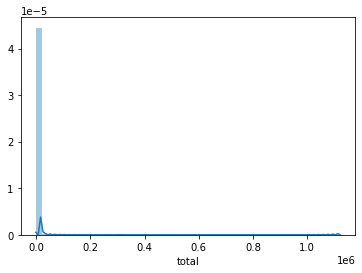

In [5]:
sns.distplot(dados_bruto['total'])

In [6]:
dados_bruto.query("total > 200000")

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


### Achamos alguns erros talvez de digitação ou talvez do próprio dataset de qualquer jeito estes valores serão retirados por não fazerem sentido com o dataset

In [7]:
dados_bruto.drop([255, 2859,6230,6645,6979], inplace = True)

In [8]:
dados_bruto.query("total > 200000")

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total


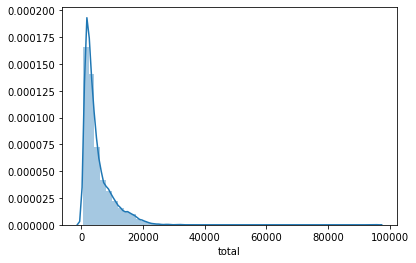

In [9]:
sns.distplot(dados_bruto.total)

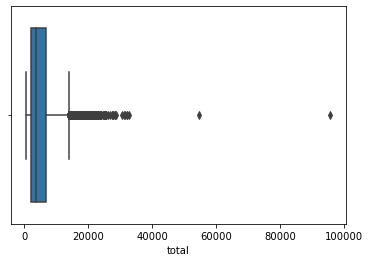

In [10]:
sns.boxplot(dados_bruto.total)

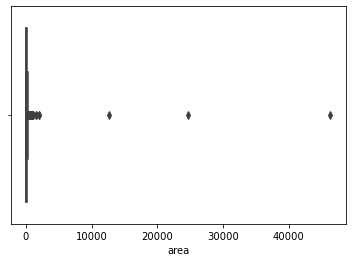

In [11]:
sns.boxplot(dados_bruto.area)

In [12]:
dados_bruto.query('area > 20000')

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320


In [13]:
dados_bruto.drop([2397,5915,9241], inplace = True)

In [14]:
dados_bruto.query('area > 10000')

,cidade,area,quartos,banheiros,estacionamento,andar,animal,mobiliado,hoa,valor_aluguel,imposto,seguro_fogo,total


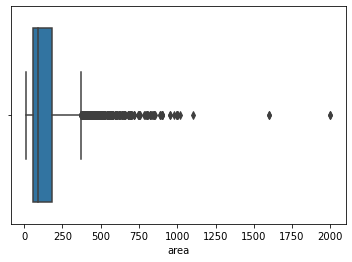

In [15]:
sns.boxplot(dados_bruto.area)

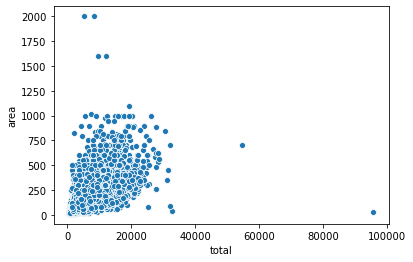

In [16]:
sns.scatterplot(x = 'total', y = 'area', data= dados_bruto)

In [17]:
dados_bruto.describe()

,area,quartos,banheiros,estacionamento,hoa,valor_aluguel,imposto,seguro_fogo,total
count,10684.000000,10684.000000,10684.000000,10684.000000,10684.000000,10684.000000,10684.000000,10684.000000,10684.000000
mean,141.406589,2.505709,2.235399,1.608854,926.061026,3893.709753,336.535006,53.270311,5209.765069
std,134.355167,1.170748,1.405948,1.589196,1401.559695,3404.689533,685.074651,47.728729,4581.013212
min,11.000000,1.000000,1.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,56.000000,2.000000,1.000000,0.000000,170.000000,1529.750000,38.000000,21.000000,2060.750000
50%,90.000000,2.000000,2.000000,1.000000,559.000000,2655.000000,125.000000,36.000000,3578.500000
75%,182.000000,3.000000,3.000000,2.000000,1235.250000,5000.000000,375.000000,68.000000,6758.750000
max,2000.000000,13.000000,10.000000,12.000000,81150.000000,45000.000000,28120.000000,677.000000,95610.000000


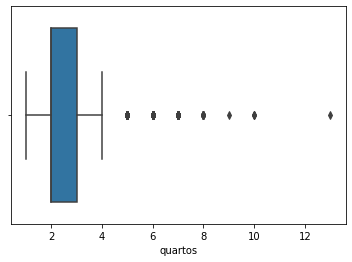

In [18]:
sns.boxplot(dados_bruto.quartos)

In [19]:
dados_bruto.quartos.min()

1

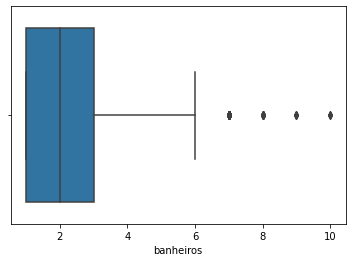

In [20]:
sns.boxplot(dados_bruto.banheiros)

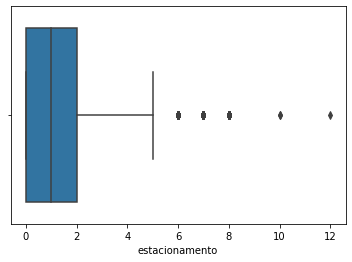

In [21]:
sns.boxplot(dados_bruto.estacionamento)

# Coeficiente Quadratico

In [25]:
def erro_quadrado_medio(previsto, y):
    return np.array([(y_test - predicts)**2 for y_test, predicts in zip(y,previsto)]).mean()

# Utilizando Log para os dados fiarem em uma mesma escala e mais lineares

In [26]:
dados_log = pd.DataFrame()

dados_log['area'] = np.log(dados_bruto['area'])
dados_log['quartos'] = np.log(dados_bruto['quartos'])
dados_log['banheiros'] = np.log(dados_bruto['banheiros'] + 1)
dados_log['estacionamento'] = np.log(dados_bruto['estacionamento']+1)
dados_log['total'] = np.log(dados_bruto['total'])

In [27]:
dados_log.head()

,area,quartos,banheiros,estacionamento,total
0,4.248495,0.693147,0.693147,0.693147,8.633731
1,5.768321,1.386294,1.609438,0.000000,8.983816
2,4.382027,0.000000,0.693147,0.693147,8.253488
3,3.931826,0.693147,0.693147,0.000000,7.259116
4,3.218876,0.000000,0.693147,0.000000,6.728629


# Utilizando uma TreeRegresion

0.4933655562666235

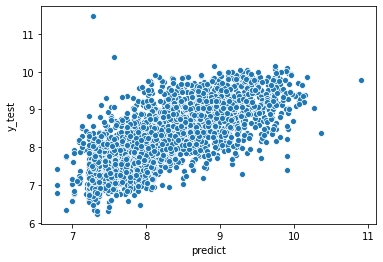

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


X = dados_log[['area', 'quartos', 'banheiros', 'estacionamento']]
Y = dados_log["total"]

X_train, X_test, y_train, y_test = train_test_split(X,Y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

predicts = model.predict(X_test_scaled)

dataset_results = pd.DataFrame()
dataset_results['predict'] = predicts
dataset_results['y_test'] = y_test.values

sns.scatterplot(x = 'predict', y = 'y_test', data=dataset_results)
r2_score(y_test,predicts)

In [43]:
print('O coeficiente do quadrado médio é: ', erro_quadrado_medio(predicts, y_test))

O coeficiente do quadrado médio é:  0.3213497510030528


In [44]:
dataset_results.head(20)

,predict,y_test
0,9.395159,9.105646
1,8.006837,8.516193
2,8.475919,8.689296
3,7.964851,9.138307
4,9.358760,8.364508
5,8.461082,8.447200
6,7.442149,8.399310
7,7.245483,7.271009
8,7.442149,7.543803
9,7.587372,7.271704


In [45]:
dataset_results.predict = np.exp(dataset_results.predict)
dataset_results.y_test = np.exp(dataset_results.y_test)
dataset_results['erro'] = dataset_results.y_test - dataset_results.predict
dataset_results

,predict,y_test,erro
0,12030.000000,9006.0,-3024.000000
1,3001.409205,4995.0,1993.590795
2,4797.831802,5939.0,1141.168198
3,2878.000000,9305.0,6427.000000
4,11600.000000,4292.0,-7308.000000
...,...,...,...
2666,3329.912759,2667.0,-662.912759
2667,3736.498361,2410.0,-1326.498361
2668,2675.000000,2017.0,-658.000000
2669,2102.740703,1418.0,-684.740703


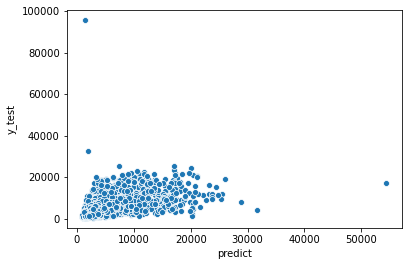

In [46]:
sns.scatterplot(x = 'predict', y = 'y_test', data = dataset_results)

## Utilizando outros modelos 

# Linear Regression

In [31]:
dados_log.corr()

,area,quartos,banheiros,estacionamento,total
area,1.000000,0.814099,0.819695,0.696108,0.740767
quartos,0.814099,1.000000,0.732491,0.612708,0.587032
banheiros,0.819695,0.732491,1.000000,0.686463,0.737267
estacionamento,0.696108,0.612708,0.686463,1.000000,0.627618
total,0.740767,0.587032,0.737267,0.627618,1.000000


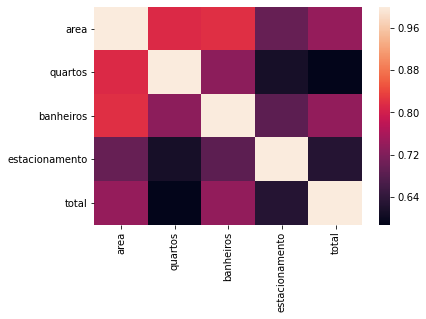

In [32]:
corr = dados_log.corr()
sns.heatmap(corr)

## LinearRegression

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


X = dados_log[['area', 'quartos', 'banheiros', 'estacionamento']]
Y = dados_log["total"]

X_train, X_test, y_train, y_test = train_test_split(X,Y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

predicts = model.predict(X_test_scaled)

dataset_results = pd.DataFrame()
dataset_results['predict'] = predicts
dataset_results['y_test'] = y_test.values
dataset_results['erro'] = dataset_results.y_test - dataset_results.predict

r2_score(y_test,predicts)

0.6059627453860712

In [34]:
print('O coeficiente do quadrado médio é: ', erro_quadrado_medio(predicts, y_test))

O coeficiente do quadrado médio é:  0.2418655148636968


## Ajeitando resultados pois estao em log E 

In [35]:
dataset_results.head(10)

,predict,y_test,erro
0,8.597098,8.634443,0.037345
1,7.187252,7.462789,0.275537
2,7.751204,7.120444,-0.630760
3,7.707135,7.928406,0.221271
4,8.167750,8.313362,0.145612
5,9.069921,8.908559,-0.161362
6,9.404548,9.136155,-0.268393
7,8.654184,9.291920,0.637737
8,8.060238,8.157084,0.096846
9,9.405251,9.474242,0.068991


In [39]:
dataset_results.predict = np.exp(dataset_results.predict)
dataset_results.y_test = np.exp(dataset_results.y_test)
dataset_results['erro'] = dataset_results.y_test - dataset_results.predict
dataset_results

,predict,y_test,erro
0,6213.000000,12550.0,6337.000000
1,13160.000000,14390.0,1230.000000
2,3502.423537,3976.0,473.576463
3,1916.304252,2221.0,304.695748
4,2480.000000,2883.0,403.000000
...,...,...,...
2666,2213.031051,1546.0,-667.031051
2667,3594.010976,3503.0,-91.010976
2668,14220.000000,8515.0,-5705.000000
2669,3250.000000,11760.0,8510.000000


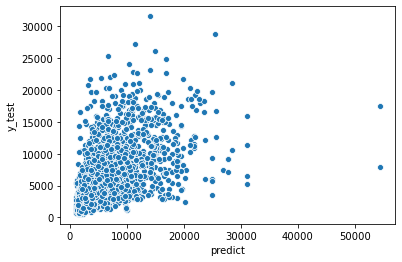

In [40]:
sns.scatterplot(x = 'predict', y = 'y_test', data = dataset_results)